<a href="https://colab.research.google.com/github/emerson-matos/tcc-notebooks/blob/main/tcc_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monta o google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Dados dos hoteis

In [ ]:
date = "2023/02/15"

## Cria o DataFrame

In [ ]:
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/tcc/data/2023/02/15/aram-beach-&-convention-gm-reviews.csv")

df[:1]

,token,review_id,retrieval_date,rating,rating_max,relative_date,likes,other_ratings,trip_type_travel_group,user_name,user_is_local_guide,user_reviews,user_photos,user_url,text,response_text,response_relative_date,errors
0,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNob1lud2ZBEAE,2023-02-15 02:48:02.460131,5.0,5.0,5 horas atrás,-1,"Destaques do hotel Luxuoso, Vista linda e Tran...",Negócios | Amigos,Lucas Victor da Luz Cesar,True,21,12.0,https://www.google.com/maps/contrib/1109357607...,NaN,NaN,NaN,[]


In [ ]:
df.loc[df['text'].notnull()].shape[0]

1652

In [ ]:
import pandas as pd
import glob
import os

path_to_lookup = f'/content/gdrive/MyDrive/tcc/data/{date}/'
file_pattern = "*.csv"

# setting the path for joining multiple files
files = os.path.join(path_to_lookup, file_pattern)

# list of merged files returned
files = glob.glob(files)

df = pd.concat(map(lambda file: pd.read_csv(file).assign(source=file.split("/")[-1]), files), ignore_index=True)
print(df.shape[0])
df = df.loc[df['text'].notna()]
df.shape[0]

332721


209946

In [ ]:
df[['source', 'rating']].groupby(['source']).size().reset_index(name='counts').sort_values("counts", ascending=False)

,source,counts
52,pratagy-beach-all-inclusive-resort-maceió---w...,19777
14,grand-palladium-imbassaí-resort-&-spa-gm-revi...,15828
5,costão-do-santinho-resort-all-inclusive-gm-re...,10517
41,iberostar-bahia-gm-reviews.csv,10045
61,serhs-natal-grand-hotel-&-resort-gm-reviews.csv,8131
...,...,...
7,dan-inn-são-paulo-higienópolis-gm-reviews.csv,637
42,iberostar-grand-amazon-gm-reviews.csv,617
17,hotel-atlântico-avenida-gm-reviews.csv,404
24,hotel-beira-mar-gm-reviews.csv,384


In [ ]:
df.describe()

,rating,rating_max,user_photos
count,209946.00000,209946.0,117705.000000
mean,4.39211,5.0,68.633708
std,1.10198,0.0,141.699008
min,1.00000,5.0,1.000000
25%,4.00000,5.0,3.000000
50%,5.00000,5.0,13.000000
75%,5.00000,5.0,58.000000
max,5.00000,5.0,999.000000


In [ ]:
!pip version seaborn

ERROR: unknown command "version"


In [ ]:
import seaborn as sns
sns.__version__


'0.11.2'

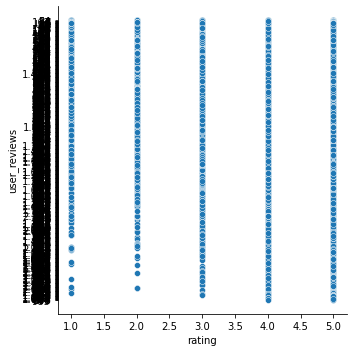

In [ ]:
sns.relplot(x="rating", y="user_reviews", data=df)

In [ ]:
df[:1]

,token,review_id,retrieval_date,rating,rating_max,relative_date,likes,other_ratings,trip_type_travel_group,user_name,user_is_local_guide,user_reviews,user_photos,user_url,text,response_text,response_relative_date,errors,source
0,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNoNFlDWlB3EAE,2023-02-15 02:48:01.831814,4.0,5.0,2 horas atrás,0,Quartos : 3/5 | Serviço : 5/5 | Local : 4/5 De...,Férias | Família,Roberto Pavani,True,24,23.0,https://www.google.com/maps/contrib/1046728384...,"A parte de lazer, especialmente para crianças,...",NaN,NaN,[],cassino-all-inclusive-resort-poços-gm-reviews...


In [ ]:
from datetime import datetime, timedelta
import re

def obtem_data(row):
  
  # String de data relativa
  data_relativa_str = row.relative_date
  timestamp = row.retrieval_date
  
  # Converte a string em um objeto timedelta
  unidade_tempo = data_relativa_str.split()[1]
  quantidade_tempo = 1 if 'um' in data_relativa_str.split()[0] else int(data_relativa_str.split()[0])

  if 'segundo' in unidade_tempo:
      data_relativa = timedelta(seconds=quantidade_tempo)
  elif 'minuto' in unidade_tempo:
      data_relativa = timedelta(minutes=quantidade_tempo)
  elif 'hora' in unidade_tempo:
      data_relativa = timedelta(hours=quantidade_tempo)
  elif 'dia' in unidade_tempo:
      data_relativa = timedelta(days=quantidade_tempo)
  elif 'semana' in unidade_tempo:
      data_relativa = timedelta(weeks=quantidade_tempo)
  elif re.match(r"m(ê|e)s", unidade_tempo):
      data_relativa = timedelta(days=30*quantidade_tempo)
  elif 'ano' in unidade_tempo:
      data_relativa = timedelta(days=365*quantidade_tempo)
  else:
      return timestamp

  # Timestamp
  try:
    dt_timestamp = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f')
  except:
    dt_timestamp = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S')
  
  return (dt_timestamp - data_relativa).date()

  

teste = df.copy()
teste['data_avaliacao'] = teste.apply(obtem_data, axis=1)

teste

,token,review_id,retrieval_date,rating,rating_max,relative_date,likes,other_ratings,trip_type_travel_group,user_name,user_is_local_guide,user_reviews,user_photos,user_url,text,response_text,response_relative_date,errors,source,data_avaliacao
0,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNoNFlDWlB3EAE,2023-02-15 02:48:01.831814,4.0,5.0,2 horas atrás,0,Quartos : 3/5 | Serviço : 5/5 | Local : 4/5 De...,Férias | Família,Roberto Pavani,True,24,23.0,https://www.google.com/maps/contrib/1046728384...,"A parte de lazer, especialmente para crianças,...",NaN,NaN,[],cassino-all-inclusive-resort-poços-gm-reviews...,2023-02-15
1,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNoZ2ZYMlFnEAE,2023-02-15 02:48:01.836818,5.0,5.0,12 horas atrás,0,Quartos : 5/5 | Serviço : 5/5 | Local : 5/5,NaN,Emerson Fructuoso,True,54,42.0,https://www.google.com/maps/contrib/1172185498...,Muito bom.,"Olá, Sr. Emerson! Obrigado por avaliar o Cassi...",7 horas atrás,[],cassino-all-inclusive-resort-poços-gm-reviews...,2023-02-14
2,CAESBkVnSUlDZw==,ChdDSUhNMG9nS0VJQ0FnSUNoX3EydXBRRRAB,2023-02-15 02:48:01.839825,4.0,5.0,16 horas atrás,0,Quartos : 5/5 | Serviço : 4/5 | Local : 4/5,NaN,GILBERTO ELPES,True,167,215.0,https://www.google.com/maps/contrib/1107468896...,Precisa somente de alguma reformas em mesas de...,"Olá, Sr. Gilberto! Obrigado pela gentileza em ...",7 horas atrás,[],cassino-all-inclusive-resort-poços-gm-reviews...,2023-02-14
3,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNoM3NXMGV3EAE,2023-02-15 02:48:01.842919,5.0,5.0,um dia atrás,0,NaN,NaN,Ingrid Sobrinho,False,7,12.0,https://www.google.com/maps/contrib/1184279438...,Que experiência incrível !!!!! Eu queria muito...,"Olá, Sra. Ingrid! Obrigado por avaliar o Cassi...",7 horas atrás,[],cassino-all-inclusive-resort-poços-gm-reviews...,2023-02-14
4,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNobm9xT0lnEAE,2023-02-15 02:48:01.847158,3.0,5.0,um dia atrás,0,Quartos : 3/5 | Serviço : 3/5 | Local : 3/5,Férias | Família,Elaine pasin,False,8,4.0,https://www.google.com/maps/contrib/1009507548...,O espaço é grande é diferente. Mas falta manut...,"Olá, Sra. Elaine! Obrigado pela gentileza em n...",7 horas atrás,[],cassino-all-inclusive-resort-poços-gm-reviews...,2023-02-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332715,CAESCEVnUUkycVVC,ChZDSUhNMG9nS0VJQ0FnSUN3cC1xdFpBEAE,2023-02-15 05:54:56.247935,5.0,5.0,10 anos atrás,0,NaN,NaN,Fabio Reis,True,34,NaN,https://www.google.com/maps/contrib/1122813631...,Lua de mel com minha amada...,NaN,NaN,[],grand-palladium-imbassaí-resort-&-spa-gm-revi...,2013-02-17
332716,NaN,ChZDSUhNMG9nS0VJQ0FnSURnMnE3REJnEAE,2023-02-15 05:54:58.712547,3.0,5.0,10 anos atrás,0,NaN,NaN,Paulo Meccia,True,45,101.0,https://www.google.com/maps/contrib/1053906591...,Peca muito no serviço! Mas tanto que para melh...,NaN,NaN,[],grand-palladium-imbassaí-resort-&-spa-gm-revi...,2013-02-17
332717,NaN,ChZDSUhNMG9nS0VJQ0FnSUNRaHJPOVJ3EAE,2023-02-15 05:54:58.715909,5.0,5.0,10 anos atrás,0,NaN,NaN,Fernando Siqueira,False,Um,NaN,https://www.google.com/maps/contrib/1179204367...,As criancas estao adorando!!!,NaN,NaN,[],grand-palladium-imbassaí-resort-&-spa-gm-revi...,2013-02-17
332718,NaN,ChdDSUhNMG9nS0VJQ0FnSUNBNHBDdm1RRRAB,2023-02-15 05:54:58.718413,5.0,5.0,10 anos atrás,0,NaN,NaN,João Paulo Camarotti,True,175,189.0,https://www.google.com/maps/contrib/1140942888...,Lua de mel com minha amada!,NaN,NaN,[],grand-palladium-imbassaí-resort-&-spa-gm-revi...,2013-02-17


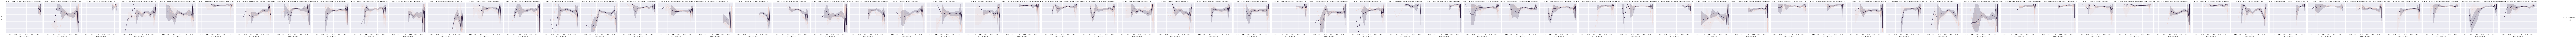

In [ ]:
import seaborn as sns

sns.relplot(x='data_avaliacao', y='rating', col='source', hue='user_is_local_guide',
    kind="line", data=teste)

<AxesSubplot:>

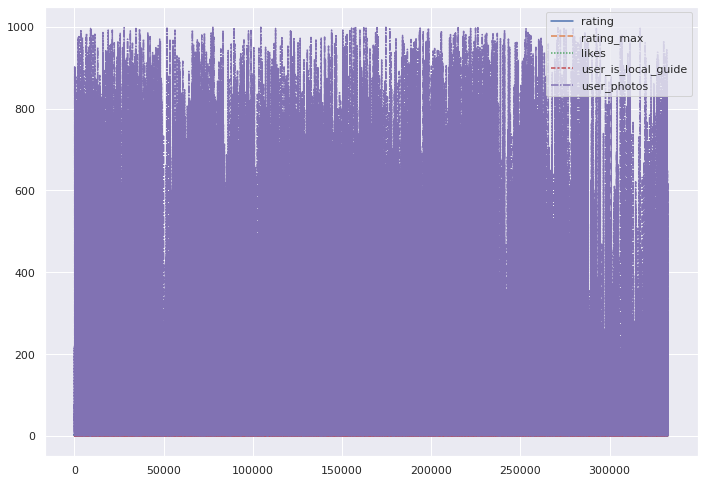

In [ ]:
 sns.lineplot(data=teste)

In [ ]:
teste

,token,review_id,retrieval_date,rating,rating_max,relative_date,likes,other_ratings,trip_type_travel_group,user_name,...,user_reviews,user_photos,user_url,text,response_text,response_relative_date,errors,source,data_avaliacao,retrieval
0,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNoNFlDWlB3EAE,2023-02-15 02:48:01.831814,4.0,5.0,2 horas atrás,0,Quartos : 3/5 | Serviço : 5/5 | Local : 4/5 De...,Férias | Família,Roberto Pavani,...,24,23.0,https://www.google.com/maps/contrib/1046728384...,"A parte de lazer, especialmente para crianças,...",NaN,NaN,[],cassino-all-inclusive-resort-poços-gm-reviews...,2023-02-15,2023-02-15
1,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNoZ2ZYMlFnEAE,2023-02-15 02:48:01.836818,5.0,5.0,12 horas atrás,0,Quartos : 5/5 | Serviço : 5/5 | Local : 5/5,NaN,Emerson Fructuoso,...,54,42.0,https://www.google.com/maps/contrib/1172185498...,Muito bom.,"Olá, Sr. Emerson! Obrigado por avaliar o Cassi...",7 horas atrás,[],cassino-all-inclusive-resort-poços-gm-reviews...,2023-02-14,2023-02-15
2,CAESBkVnSUlDZw==,ChdDSUhNMG9nS0VJQ0FnSUNoX3EydXBRRRAB,2023-02-15 02:48:01.839825,4.0,5.0,16 horas atrás,0,Quartos : 5/5 | Serviço : 4/5 | Local : 4/5,NaN,GILBERTO ELPES,...,167,215.0,https://www.google.com/maps/contrib/1107468896...,Precisa somente de alguma reformas em mesas de...,"Olá, Sr. Gilberto! Obrigado pela gentileza em ...",7 horas atrás,[],cassino-all-inclusive-resort-poços-gm-reviews...,2023-02-14,2023-02-15
3,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNoM3NXMGV3EAE,2023-02-15 02:48:01.842919,5.0,5.0,um dia atrás,0,NaN,NaN,Ingrid Sobrinho,...,7,12.0,https://www.google.com/maps/contrib/1184279438...,Que experiência incrível !!!!! Eu queria muito...,"Olá, Sra. Ingrid! Obrigado por avaliar o Cassi...",7 horas atrás,[],cassino-all-inclusive-resort-poços-gm-reviews...,2023-02-14,2023-02-15
4,CAESBkVnSUlDZw==,ChZDSUhNMG9nS0VJQ0FnSUNobm9xT0lnEAE,2023-02-15 02:48:01.847158,3.0,5.0,um dia atrás,0,Quartos : 3/5 | Serviço : 3/5 | Local : 3/5,Férias | Família,Elaine pasin,...,8,4.0,https://www.google.com/maps/contrib/1009507548...,O espaço é grande é diferente. Mas falta manut...,"Olá, Sra. Elaine! Obrigado pela gentileza em n...",7 horas atrás,[],cassino-all-inclusive-resort-poços-gm-reviews...,2023-02-14,2023-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332715,CAESCEVnUUkycVVC,ChZDSUhNMG9nS0VJQ0FnSUN3cC1xdFpBEAE,2023-02-15 05:54:56.247935,5.0,5.0,10 anos atrás,0,NaN,NaN,Fabio Reis,...,34,NaN,https://www.google.com/maps/contrib/1122813631...,Lua de mel com minha amada...,NaN,NaN,[],grand-palladium-imbassaí-resort-&-spa-gm-revi...,2013-02-17,2023-02-15
332716,NaN,ChZDSUhNMG9nS0VJQ0FnSURnMnE3REJnEAE,2023-02-15 05:54:58.712547,3.0,5.0,10 anos atrás,0,NaN,NaN,Paulo Meccia,...,45,101.0,https://www.google.com/maps/contrib/1053906591...,Peca muito no serviço! Mas tanto que para melh...,NaN,NaN,[],grand-palladium-imbassaí-resort-&-spa-gm-revi...,2013-02-17,2023-02-15
332717,NaN,ChZDSUhNMG9nS0VJQ0FnSUNRaHJPOVJ3EAE,2023-02-15 05:54:58.715909,5.0,5.0,10 anos atrás,0,NaN,NaN,Fernando Siqueira,...,Um,NaN,https://www.google.com/maps/contrib/1179204367...,As criancas estao adorando!!!,NaN,NaN,[],grand-palladium-imbassaí-resort-&-spa-gm-revi...,2013-02-17,2023-02-15
332718,NaN,ChdDSUhNMG9nS0VJQ0FnSUNBNHBDdm1RRRAB,2023-02-15 05:54:58.718413,5.0,5.0,10 anos atrás,0,NaN,NaN,João Paulo Camarotti,...,175,189.0,https://www.google.com/maps/contrib/1140942888...,Lua de mel com minha amada!,NaN,NaN,[],grand-palladium-imbassaí-resort-&-spa-gm-revi...,2013-02-17,2023-02-15
